In [21]:
#based in this code - https://www.kaggle.com/mahmoudelfahl/cohort-analysis-customer-segmentation-with-rfm#Cohort-Analysis-(Retention-over-User-&-Product-Lifetime)

In [22]:
# import libray

import numpy as np
import pandas as pd
import datetime as dt

#For data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#For Machine Learning Algorithm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [23]:
#import file
df = pd.read_excel('kaggle/Online Retail.xlsx')

In [24]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [25]:
df.shape

(541909, 8)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [27]:
#CHECKING MISSING VALUES
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [28]:
#drop the columns with missing values
df = df.dropna(subset=['CustomerID'])

In [29]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [30]:
#CHECK and CLEAN Duplicates Data
df.duplicated().sum()

5225

In [31]:
df = df.drop_duplicates()

In [32]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [33]:
"""
Note that the Quantity is less than zero, so its wrong. We need to fix
And the Price is equal 0, so its wrong.
"""

'\nNote that the Quantity is less than zero, so its wrong. We need to fix\nAnd the Price is equal 0, so its wrong.\n'

In [34]:
#df[df['UnitPrice'] == 0]

In [35]:
df = df[(df['UnitPrice'] > 0) & (df['Quantity'] > 0)]

In [36]:
df.describe() 

,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865
std,180.492832,22.241836,1713.539549
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [37]:
df.shape

(392692, 8)

In [38]:
# LETS MAKE COHORT ANALYSIS
""""
Invoice Period -> string representation of the year and month of a single
transaction / invoice
Cohort group -> string representation of the year and month of a customer
first purchase. This label is common across all invoices for a particular
customer.
Cohort period / Cohort Index - > string representation a customer's page
in its 'lifetime'. The number representes the number of months passed
since the firts purchase.
"""

'"\nInvoice Period -> string representation of the year and month of a single\ntransaction / invoice\nCohort group -> string representation of the year and month of a customer\nfirst purchase. This label is common across all invoices for a particular\ncustomer.\nCohort period / Cohort Index - > string representation a customer\'s page\nin its \'lifetime\'. The number representes the number of months passed\nsince the firts purchase.\n'

In [39]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [40]:
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

In [41]:
df['InvoiceMonth'] = df['InvoiceDate'].apply(get_month)

In [42]:
grouping = df.groupby('CustomerID')['InvoiceMonth']

In [43]:
df['CohortMonth'] = grouping.transform('min')

In [44]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01


In [45]:
def get_month_int(dframe, columns):
    year = dframe[columns].dt.year
    month = dframe[columns].dt.month
    day = dframe[columns].dt.day
    
    return year, month, day

In [46]:
invoice_year, invoice_month, _ = get_month_int(df, 'InvoiceMonth')

In [47]:
cohort_year, cohort_month, _ = get_month_int(df, 'CohortMonth')

In [48]:
year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohort_month

In [49]:
df['CohortIndex'] = year_diff * 12 + month_diff + 1

In [50]:
#Count Monthly active customers from each cohort
grouping  = df.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)

#Return number of unique elements in the object
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth', 
                                  columns = 'CohortIndex', 
                                  values='CustomerID')

In [51]:
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
#Retention Table
cohort_size = cohort_counts.iloc[:,0]

retention = cohort_counts.divide(cohort_size, axis=0)
retention.round(3) * 100 

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,36.6,32.3,38.4,36.3,39.8,36.3,34.9,35.4,39.5,37.4,50.3,26.6
2011-01-01,100.0,22.1,26.6,23.0,32.1,28.8,24.7,24.2,30.0,32.6,36.5,11.8,NaN
2011-02-01,100.0,18.7,18.7,28.4,27.1,24.7,25.3,27.9,24.7,30.5,6.8,NaN,NaN
2011-03-01,100.0,15.0,25.2,19.9,22.3,16.8,26.8,23.0,27.9,8.6,NaN,NaN,NaN
2011-04-01,100.0,21.3,20.3,21.0,19.7,22.7,21.7,26.0,7.3,NaN,NaN,NaN,NaN
2011-05-01,100.0,19.0,17.3,17.3,20.8,23.2,26.4,9.5,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,17.4,15.7,26.4,23.1,33.5,9.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,18.1,20.7,22.3,27.1,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,20.7,24.9,24.3,12.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


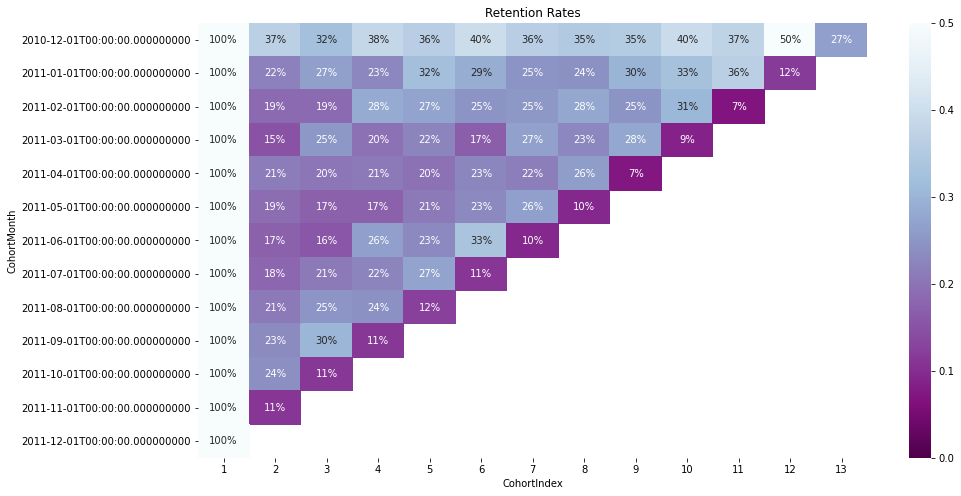

In [53]:
#Build the heatmap
plt.figure(figsize=(15,8))
plt.title('Retention Rates')
sns.heatmap(data = retention, annot= True, fmt = '.0%', vmin=0.0, 
           vmax= 0.5, cmap='BuPu_r')
plt.show()

In [54]:
"""
That customer retention is a very useful metric to understand how many
of the all customers are still active. Retention gives you the percentage
of active customers compared to the total number of customers.
"""

'\nThat customer retention is a very useful metric to understand how many\nof the all customers are still active. Retention gives you the percentage\nof active customers compared to the total number of customers.\n'

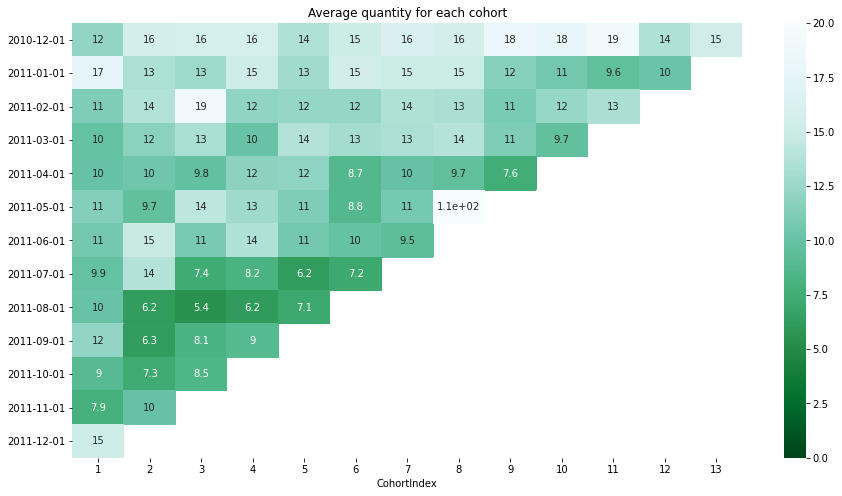

In [55]:
#AVERAGE QUANTITY FOR EACH COHORT

grouping  = df.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['Quantity'].mean()
cohort_data = cohort_data.reset_index()

average_quantity = cohort_data.pivot(index= 'CohortMonth', 
                                    columns='CohortIndex',
                                    values= 'Quantity')

average_quantity.round(1)
average_quantity.index = average_quantity.index.date

plt.figure(figsize=(15,8))
plt.title('Average quantity for each cohort')
sns.heatmap(data = average_quantity, annot= True, vmin = 0.0, 
           vmax = 20, cmap='BuGn_r')
plt.show()

In [56]:
# Recency, Frequency and Monetary Value calculation
"""
RFM - Percentiles e.g. quantiles
Process of calculation percentiles:
1. Sort costumers based on that metric
2. Break Customers into a pre-defined number of groups of equal size
3. Assign a label to each group
"""

'\nRFM - Percentiles e.g. quantiles\nProcess of calculation percentiles:\n1. Sort costumers based on that metric\n2. Break Customers into a pre-defined number of groups of equal size\n3. Assign a label to each group\n'

In [57]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1


In [58]:
#New Total Sum Columns
df['TotalSum'] = df['UnitPrice'] * df['Quantity']

#Data preparation Steps

print('Min Invoice Date:', df.InvoiceDate.dt.date.min(), 'Max Invoice Date:', 
     df.InvoiceDate.dt.date.max())

df.head(3)

Min Invoice Date: 2010-12-01 Max Invoice Date: 2011-12-09


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex,TotalSum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1,22.00


In [59]:
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)
snapshot_date

"""
The last day of purchase in total is 09 DEC, 2011. To calculate the 
day periods, let's set one day after the last one,or 10 DEC as a 
snapshot_date. We will cound the diff days with snapshot_date
"""

"\nThe last day of purchase in total is 09 DEC, 2011. To calculate the \nday periods, let's set one day after the last one,or 10 DEC as a \nsnapshot_date. We will cound the diff days with snapshot_date\n"

In [60]:
# Calculate RFM metrics

rfm = df.groupby(['CustomerID']).agg({'InvoiceDate': lambda x: 
                                     (snapshot_date - x.max()).days,
                                    'InvoiceNo':'count', 'TotalSum': 'sum'})

In [61]:
rfm.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 
                    'TotalSum': 'MonetaryValue'}, inplace=True)

rfm.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [62]:
"""
'Recency' -> customer who have been active more recently better than the less
customer, because each company wants its customers to be recent.
'Frequency' and 'MonetaryValue' higher label because we want Customer to 
spend more money and visit more often.
"""

"\n'Recency' -> customer who have been active more recently better than the less\ncustomer, because each company wants its customers to be recent.\n'Frequency' and 'MonetaryValue' higher label because we want Customer to \nspend more money and visit more often.\n"

In [63]:
#Building RFM segments
r_labels = range(4,0,-1)
f_labels = range(1,5)
m_labels = range(1,5)

r_quartiles = pd.qcut(rfm['Recency'], q=4, labels = r_labels)
f_quartiles = pd.qcut(rfm['Frequency'], q=4, labels = f_labels)
m_quartiles = pd.qcut(rfm['MonetaryValue'], q=4, labels = m_labels)

rfm = rfm.assign(R=r_quartiles, F=f_quartiles, M=m_quartiles)

In [64]:
#Build RFM Segment and RFM Score
def add_rfm(x):
    return str(x['R']) + str(x['F']) + str(x['M'])

In [65]:
rfm['RFM_Segment'] = rfm.apply(add_rfm,axis=1 )
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)

rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,4,1.01.04.0,6
12347.0,2,182,4310.00,4,4,4,4.04.04.0,12
12348.0,75,31,1797.24,2,2,4,2.02.04.0,8
12349.0,19,73,1757.55,3,3,4,3.03.04.0,10
12350.0,310,17,334.40,1,1,2,1.01.02.0,4


In [66]:
# ANALYSING RFM SEGMENTS

"""
Largest RFM segments it is always the best practice to investigate the size of
the segments before you use them for targeting or other business application
"""

'\nLargest RFM segments it is always the best practice to investigate the size of\nthe segments before you use them for targeting or other business application\n'

In [67]:
rfm.groupby(['RFM_Segment']).size().sort_values(ascending=False)[:5]

RFM_Segment
4.04.04.0    450
1.01.01.0    381
3.04.04.0    217
1.02.02.0    206
2.01.01.0    179
dtype: int64

In [68]:
# Filtering on RFM segments
# Select bottom RFM segment '111' and view top 5 rows

rfm[rfm['RFM_Segment'] == '111'].head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,


In [69]:
# Summary metrics per RFM Score

rfm.groupby('RFM_Score').agg({'Recency': 'mean', 'Frequency': 'mean', 
                             'MonetaryValue': 'mean'}).round(1)

,Recency,Frequency,MonetaryValue
RFM_Score,,,
3,260.7,8.2,157.4
4,177.2,13.6,240.0
5,152.9,21.2,366.6
6,95.9,27.9,820.8
7,79.6,38.0,758.1
8,64.1,56.0,987.3
9,45.9,78.7,1795.1
10,32.4,110.5,2056.4
11,21.3,186.9,4062.0


In [70]:
#Use RFM score to group customers into Gold, Silver and Bronze segments:

def segments(df):
    if df['RFM_Score'] > 9:
        return 'Gold'
    elif (df['RFM_Score'] > 5) and (df['RFM_Score'] <= 9):
        return 'Silver'
    else:
        return 'Bronze'

In [71]:
rfm['General_Segment'] = rfm.apply(segments, axis=1)

rfm.groupby('General_Segment').agg({'Recency':'mean','Frequency':'mean', 
                                   'MonetaryValue': 'mean'}).round(1)

,Recency,Frequency,MonetaryValue
General_Segment,,,
Bronze,192.2,15.1,266.5
Gold,20.1,225.6,5246.8
Silver,72.0,49.4,1072.4


In [72]:
#DATA PRE-PROCESSING FOR KMEANS CLUSTERING
"""
We must check these Key KMeans assumptions before we implement our KMeans
Clustering Mode:
- Symmetric Distribution of variabel (not skewed)
- Variables with same average values
- Variables with same variance
"""

'\nWe must check these Key KMeans assumptions before we implement our KMeans\nClustering Mode:\n- Symmetric Distribution of variabel (not skewed)\n- Variables with same average values\n- Variables with same variance\n'

In [75]:
rfm_rfm = rfm[['Recency', 'Frequency', 'MonetaryValue']]
rfm_rfm.describe()

,Recency,Frequency,MonetaryValue
count,4338.000000,4338.000000,4338.000000
mean,92.536422,90.523744,2048.688081
std,100.014169,225.506968,8985.230220
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,306.482500
50%,51.000000,41.000000,668.570000
75%,142.000000,98.000000,1660.597500
max,374.000000,7676.000000,280206.020000


In [ ]:
"""
From this table, we find the problem : mean and variance are not equal
Solution: Scaling variables by using a scaler from scikit learn
"""

C:\Users\conra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\conra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\conra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

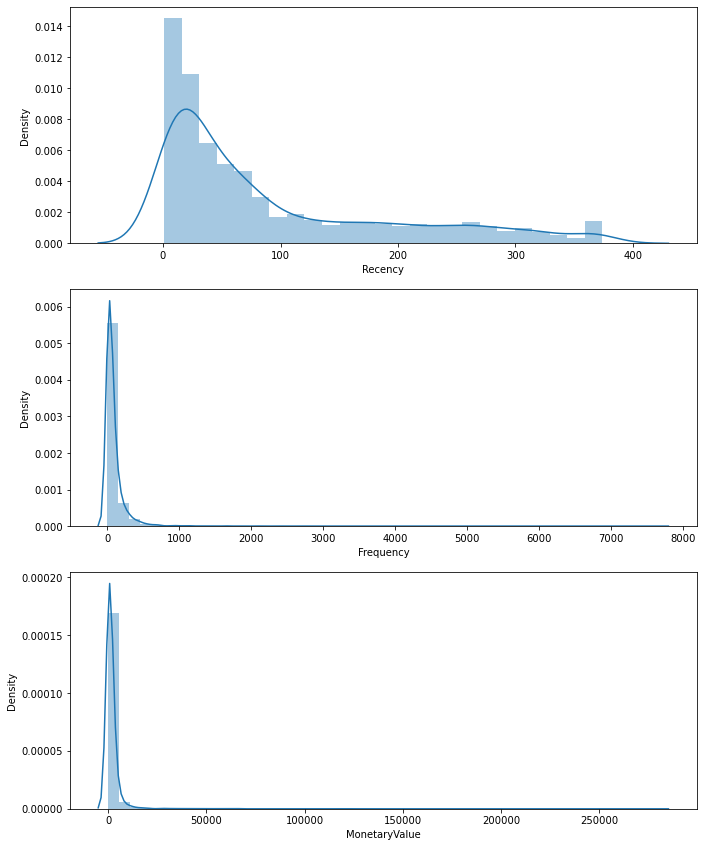

In [79]:
#plot the distribution of RFM Values

f,ax = plt.subplots(figsize=(10, 12))
plt.subplot(3, 1, 1); sns.distplot(rfm.Recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.distplot(rfm.Frequency, label = 'Frequency')
plt.subplot(3, 1, 3); sns.distplot(rfm.MonetaryValue, label = 'Monetary Value')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()


In [ ]:
"""
Ploblem - Unsymmetric distribution (data skewed)
Solution - Logarithmic transformation (positive values only) will
manage skewness

Sequence of process:
1. Unskew the data -> use log transformation
2. Standardize to the same average values
3. Scale to the same standar deviation
4. Store as a separate array to be used for clustering
"""

C:\Users\conra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\conra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\conra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

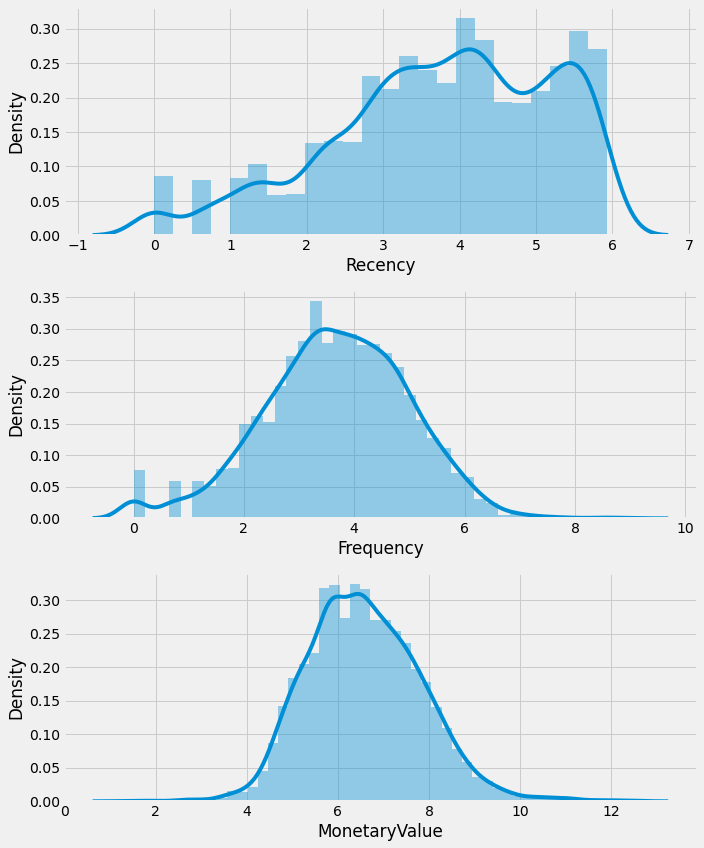

In [81]:
#Unskew the data with log transformation
rfm_log = rfm[['Recency', 'Frequency', 'MonetaryValue']].apply(np.log, axis=1).round(3)

#plot the distribution of RFM Values

f,ax = plt.subplots(figsize=(10, 12))
plt.subplot(3, 1, 1); sns.distplot(rfm_log.Recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.distplot(rfm_log.Frequency, label = 'Frequency')
plt.subplot(3, 1, 3); sns.distplot(rfm_log.MonetaryValue, label = 'Monetary Value')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()

In [ ]:
# IMPLEMENTATION OF K-MEANS CLUSTERING
"""
Steps:
1. Data Pre-processing;
2. Choosing a number of clusters;
3. Running K-Means Clustering on pre processed Data;
4. Analyzing average RFM values of each cluster
"""

In [85]:
# 1. Data Pre Processing
# Normalize the variables with StandardScaler

scaler = StandardScaler()
scaler.fit(rfm_log)

rfm_normalized = scaler.transform(rfm_log)

In [ ]:
#2. Choosing the number of Clusters
"""
Methods to define the number of clusters:
- Visual methods - elbow criterion
- Mathematical methods - silhouette coefficient
- Experimentation and interpretation

- ELBOW METHOD
Plot the cluster against within-cluster sum-of-square-erros (SSE)
Identify an elbow in the plot

"""

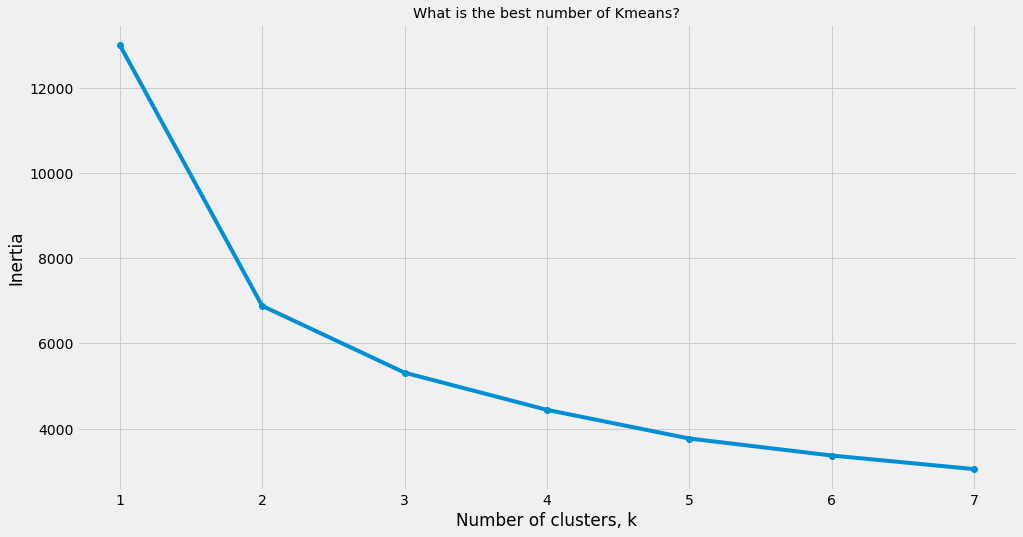

In [88]:
# KMEANS
# First: Get the best kmeans
ks = range(1,8)
inertias = []

for k in ks:
    kc = KMeans(n_clusters=k, random_state=1)
    kc.fit(rfm_normalized)
    inertias.append(kc.inertia_)

# plot ks x inertias

f, ax = plt.subplots(figsize=(15,8))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.style.use('ggplot')
plt.title('What is the best number of Kmeans?')
plt.show()

In [ ]:
# WE CHOOSE NUMBER OK KMEANS = 3

In [90]:
# Clustering
kc = KMeans(n_clusters=3, random_state=1)
kc.fit(rfm_normalized)

# Create a cluster label column in the original Dataframe
cluster_labels = kc.labels_

# Calculate average RFM Values and size for each cluster:
rfm_rfm_k3 = rfm_rfm.assign(K_Cluster = kc.labels_)

#calculate average RFM Value and sizes for each cluster:
rfm_rfm_k3.groupby('K_Cluster').agg({'Recency':'mean', 'Frequency':'mean', 'MonetaryValue': 'mean'}).round(0)

,Recency,Frequency,MonetaryValue
K_Cluster,,,
0,171.0,15.0,293.0
1,69.0,65.0,1167.0
2,13.0,260.0,6559.0


In [ ]:
"""
Snake plots to understand and compare segments:
- Market reseach technique to compare different segments;
- visual representation of each segments attributes;
- Need to first normalize data (center and scale);
- Plot each cluster's average normalized values of each attributes;

"""

In [107]:
rfm_normalized = pd.DataFrame(rfm_normalized,index=rfm_rfm.index,columns=rfm_rfm.columns)
rfm_normalized['K_Cluster'] = kc.labels_
rfm_normalized['General_Segment'] = rfm['General_Segment']
rfm_normalized.reset_index(inplace = True)

#Melt the data into a long format so RFM values and metric names are stored in 1 column each
rfm_melt = pd.melt(rfm_normalized,id_vars=['CustomerID','General_Segment','K_Cluster'], 
                   value_vars=['Recency', 'Frequency', 'MonetaryValue'],
                   var_name='Metric', value_name='Value')

rfm_melt.head()

,CustomerID,General_Segment,K_Cluster,Metric,Value
0,12346.0,Silver,1,Recency,NaN
1,12347.0,Gold,2,Recency,NaN
2,12348.0,Silver,1,Recency,NaN
3,12349.0,Gold,1,Recency,NaN
4,12350.0,Bronze,0,Recency,NaN


C:\Users\conra\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
C:\Users\conra\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
C:\Users\conra\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
C:\Users\conra\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
C:\Users\conra\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
C:\Users\conra\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


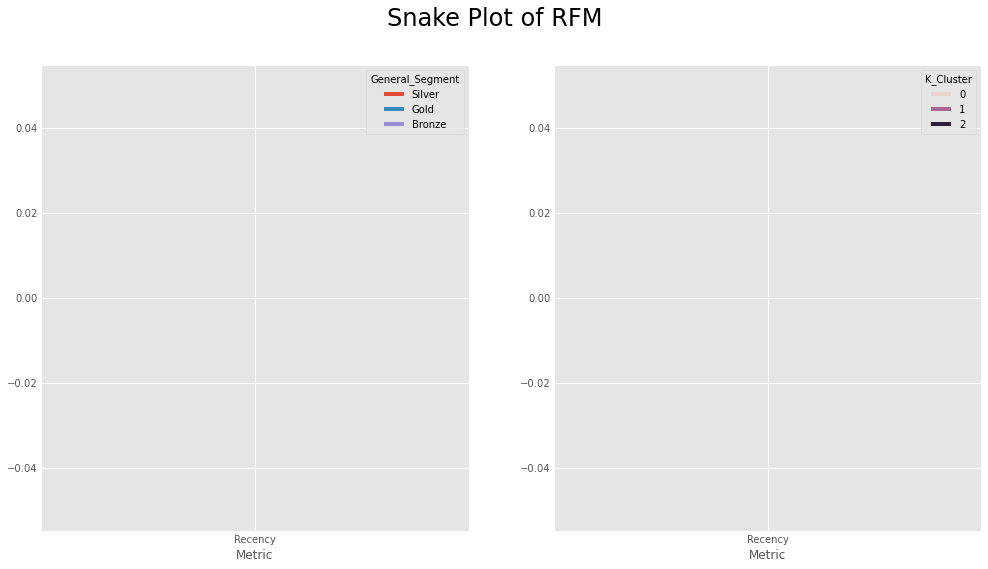

In [108]:
# SNAKE PLOT AND HEATMAP

f, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 8))
sns.lineplot(x = 'Metric', y = 'Value', hue = 'General_Segment', data = rfm_melt,ax=ax1)

# a snake plot with K-Means
sns.lineplot(x = 'Metric', y = 'Value', hue = 'K_Cluster', data = rfm_melt,ax=ax2)

plt.suptitle("Snake Plot of RFM",fontsize=24) #make title fontsize subtitle 
plt.show()

In [ ]:
"""
Relative importance of segment attributes:
- Useful technique to identify relative importance of each segment's attribute
- Calculate average values of each cluster
- Calculate average values of population
- Calculate importance score by dividing them and subtracting 1 (ensures 0 is returned when cluster average equals 
population average)
"""

In [109]:
cluster_avg = rfm_rfm_k3.groupby(['K_Cluster']).mean()
population_avg = rfm_rfm.mean()

relative_imp = cluster_avg / population_avg -1
relative_imp.round(2)

,Recency,Frequency,MonetaryValue
K_Cluster,,,
0,0.85,-0.84,-0.86
1,-0.25,-0.28,-0.43
2,-0.86,1.87,2.20


In [115]:
# the mean value in total
total_avg = rfm.iloc[:, 0:3].mean()

#calculate the proportional gap with total mean
cluster_avg = rfm.groupby('General_Segment').mean().iloc[:, 0:3]
prop_rfm = cluster_avg / total_avg - 1
prop_rfm.round(2)

,Recency,Frequency,MonetaryValue
General_Segment,,,
Bronze,1.08,-0.83,-0.87
Gold,-0.78,1.49,1.56
Silver,-0.22,-0.45,-0.48


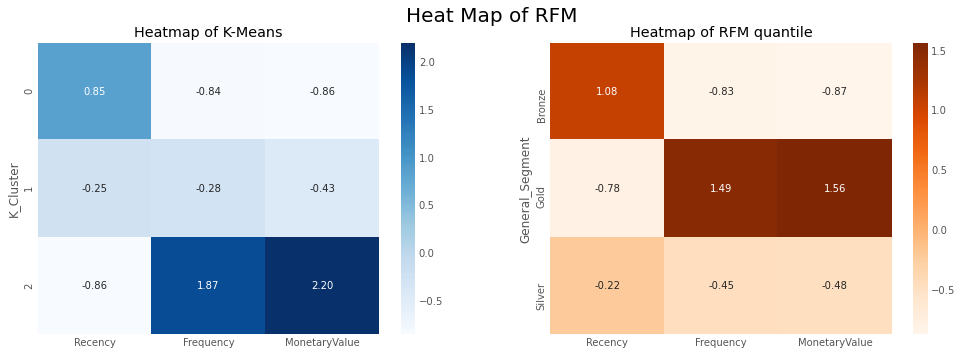

In [120]:
# heatmap with RFM
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
sns.heatmap(data = relative_imp, annot=True, fmt='.2f', 
            cmap='Blues', ax=ax1)
ax1.set(title = 'Heatmap of K-Means')

sns.heatmap(prop_rfm, annot=True, fmt='.2f', 
            cmap='Oranges', ax=ax2)
ax2.set(title = 'Heatmap of RFM quantile')

plt.suptitle('Heat Map of RFM', fontsize=20)

plt.show()

In [ ]:
#CONCLUSION
"""
Two methods of segmentation with RFM quantiles and K-Means clustering.

"""